In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
import missingno as msno

In [3]:
df= pd.read_csv('fashion_retail.txt')

In [4]:
# Type of the features available in the data!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873287 entries, 0 to 3873286
Data columns (total 11 columns):
Unnamed: 0       int64
date             object
province         object
city             object
category         object
department       object
class            object
style            object
vendor           object
totalQuantity    float64
totalSales       float64
dtypes: float64(2), int64(1), object(8)
memory usage: 325.1+ MB


# Checking for missing data!

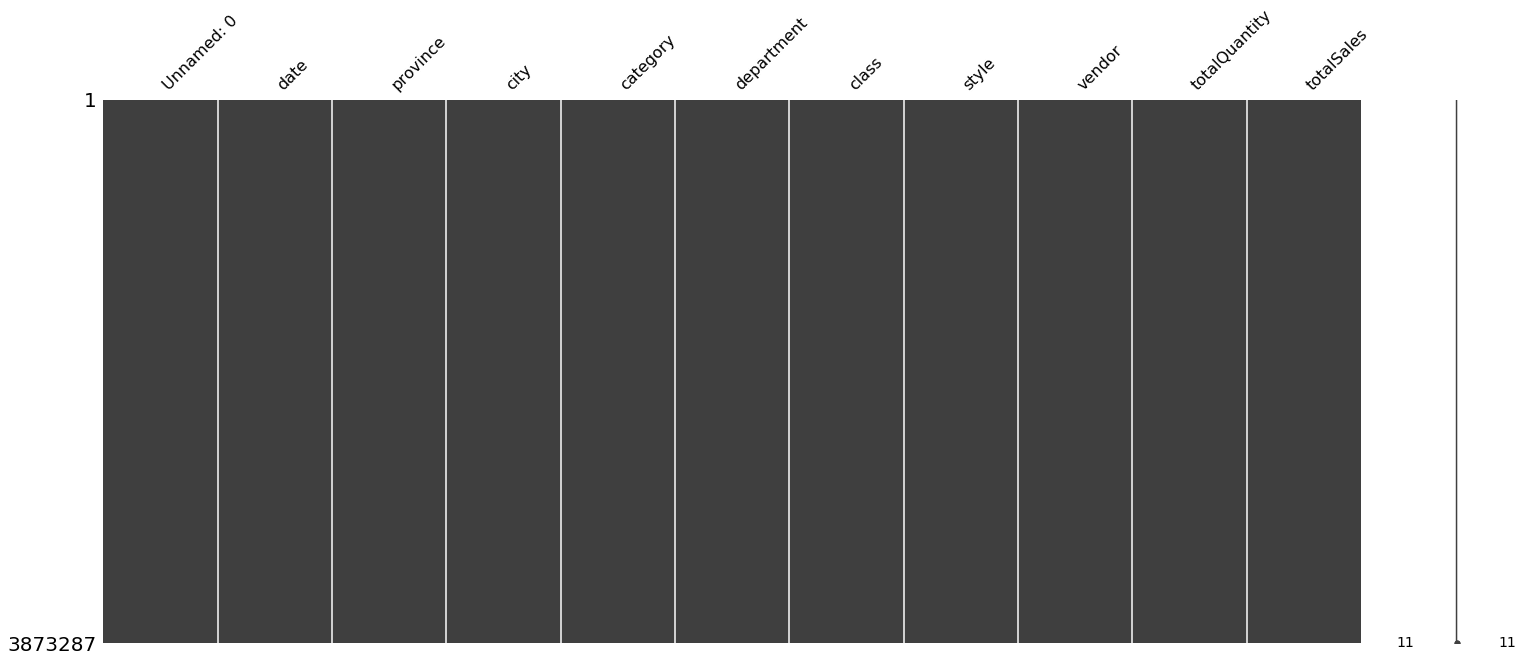

In [5]:
msno.matrix(df)

In [6]:
df=df.drop('Unnamed: 0',axis=1)

# Countplot of 44 cities !

Text(0.5, 1.0, 'Countplot of Cities')

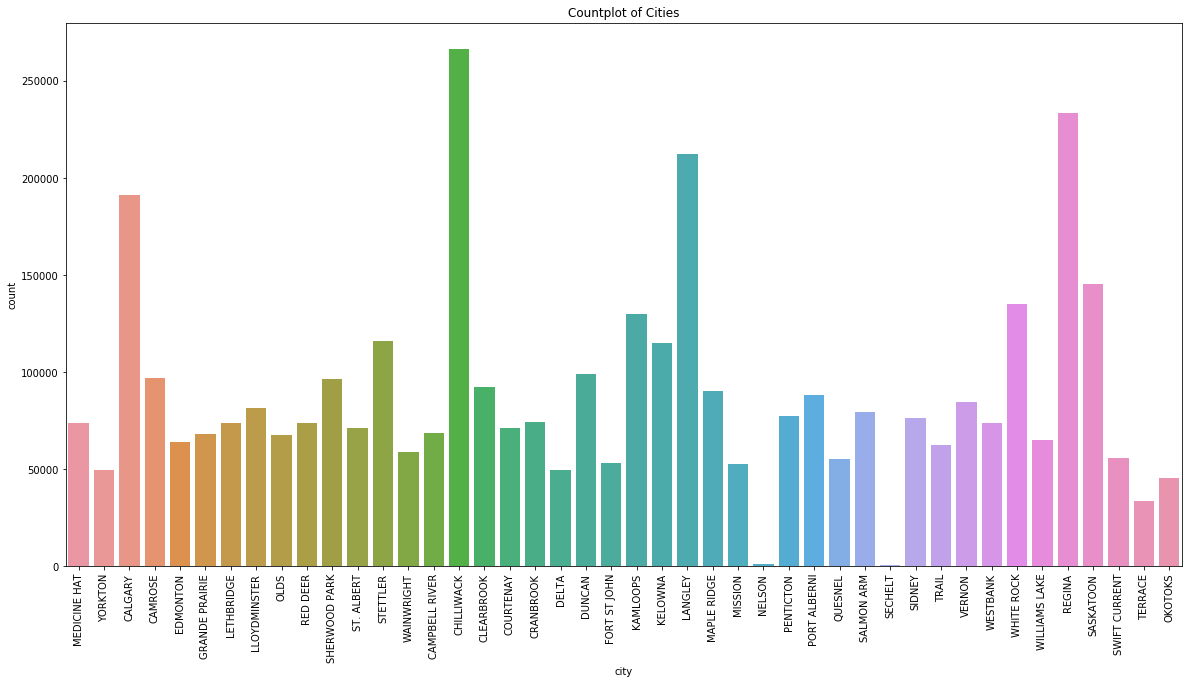

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(df['city'])
plt.xticks(rotation='vertical')
plt.title('Countplot of Cities')

In [8]:
#Unique cities in the data!
df.city.unique()

array(['MEDICINE HAT', 'YORKTON', 'CALGARY', 'CAMROSE', 'EDMONTON',
       'GRANDE PRAIRIE', 'LETHBRIDGE', 'LLOYDMINSTER', 'OLDS', 'RED DEER',
       'SHERWOOD PARK', 'ST. ALBERT', 'STETTLER', 'WAINWRIGHT',
       'CAMPBELL RIVER', 'CHILLIWACK', 'CLEARBROOK', 'COURTENAY',
       'CRANBROOK', 'DELTA', 'DUNCAN', 'FORT ST JOHN', 'KAMLOOPS',
       'KELOWNA', 'LANGLEY', 'MAPLE RIDGE', 'MISSION', 'NELSON',
       'PENTICTON', 'PORT ALBERNI', 'QUESNEL', 'SALMON ARM', 'SECHELT',
       'SIDNEY', 'TRAIL', 'VERNON', 'WESTBANK', 'WHITE ROCK',
       'WILLIAMS LAKE', 'REGINA', 'SASKATOON', 'SWIFT CURRENT', 'TERRACE',
       'OKOTOKS'], dtype=object)

In [9]:
# Count of the cities!
df.city.nunique()

44

In [10]:
#Unique Provinces!
df.province.unique()

array(['AB', 'SK', 'BC'], dtype=object)

In [11]:
#Type of category in the data!
df.category.unique()

array(['category1', 'category2'], dtype=object)

In [12]:
#Type of department present in the data!
df.department.unique()

array(['department3', 'department4', 'department5', 'department2',
       'department1', 'department11', 'department12', 'department7',
       'department13', 'department8', 'department9', 'department10',
       'department6'], dtype=object)

In [14]:
#Type of class!
df['class'].unique()

array(['class8', 'class12', 'class16', 'class17', 'class18', 'class4',
       'class10', 'class7', 'class14', 'class15', 'class1', 'class2',
       'class3', 'class5', 'class6', 'class11', 'class33', 'class38',
       'class39', 'class40', 'class41', 'class9', 'class37', 'class13',
       'class20', 'class42', 'class21', 'class36', 'class43', 'class22',
       'class34', 'class32', 'class25', 'class35', 'class26', 'class27',
       'class29', 'class28', 'class30', 'class24', 'class31', 'class19',
       'class23'], dtype=object)

In [15]:
#Style column is highly cardinal!
df['style'].nunique()

16872

In [16]:
#Vendor column is highly cardinal too!
df['vendor'].nunique()

94

In [20]:
#max sales !
df['totalSales'].max()

9685.474283096934

In [21]:
#Min sales!
df['totalSales'].min()

-13898.6555962441

# Distribution of cities in the dataset!

Text(0.5, 1.0, 'Distribution of cities of different provinces')

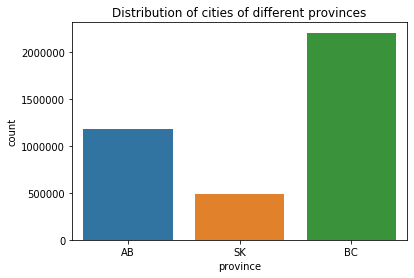

In [22]:
sns.countplot(df['province'])
plt.title('Distribution of cities of different provinces')

In [23]:
df1=df[['city','province']]

In [24]:
df1[df1.province=='AB'].nunique()

city        14
province     1
dtype: int64

In [25]:
AB=df1[df1.province=='AB']

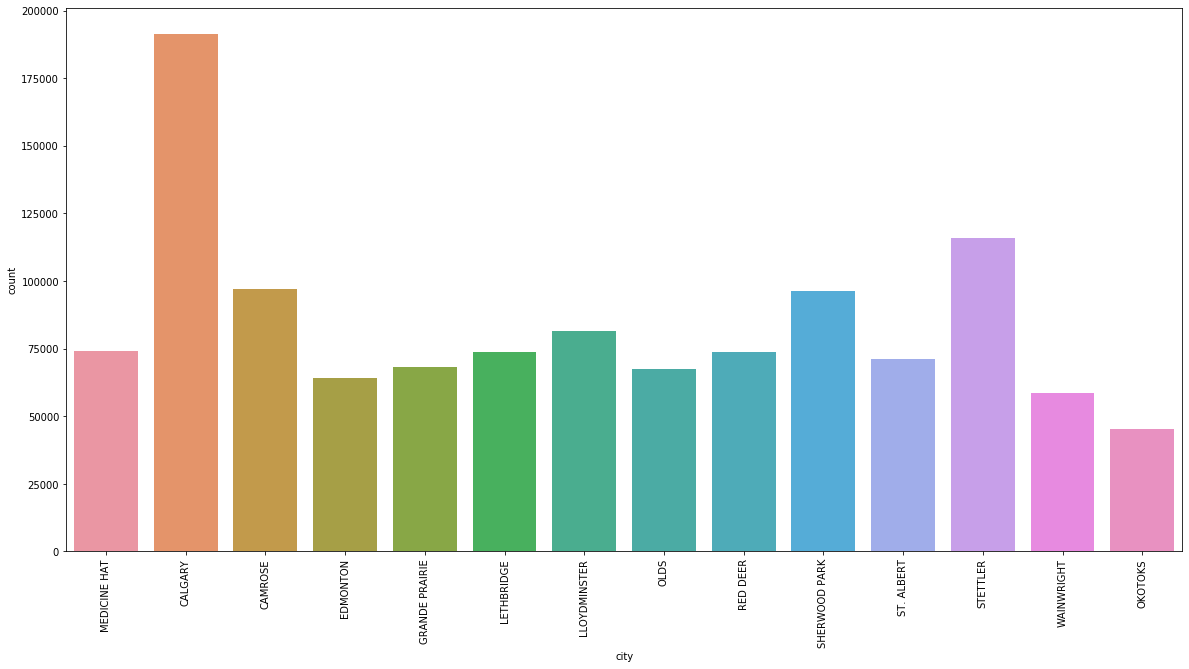

In [26]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
sns.countplot(AB.city)

# BC city's distribution !

In [27]:
BC=df1[df1.province=='BC']

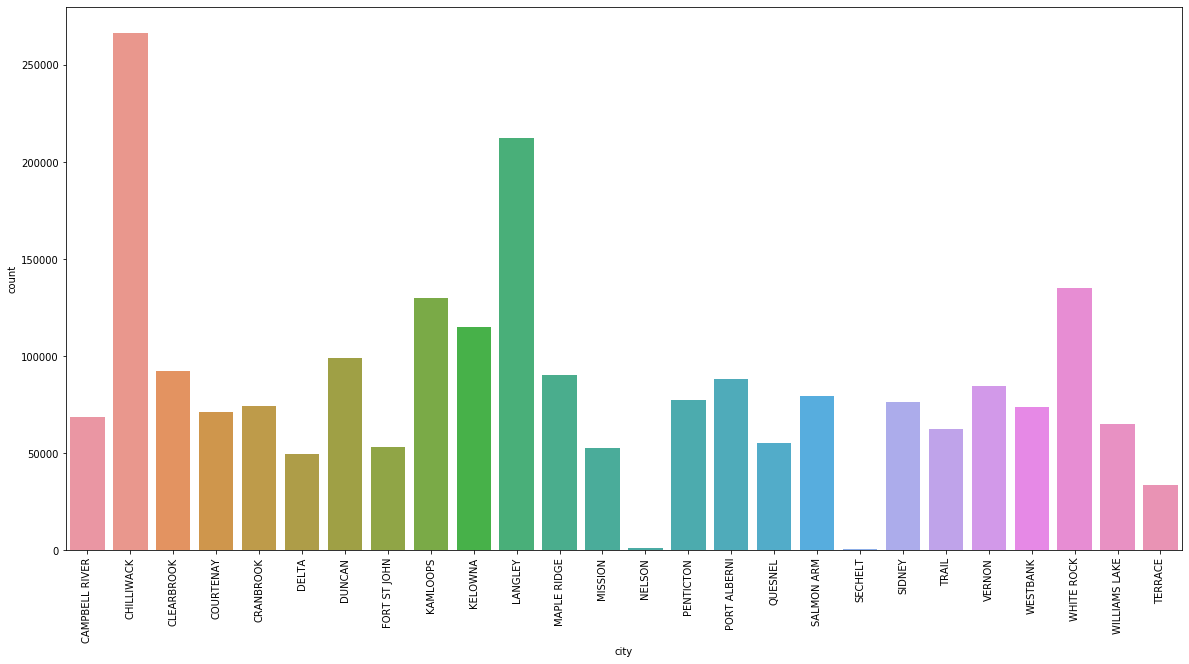

In [28]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
sns.countplot(BC.city)

# Saskatoon City's distribution!

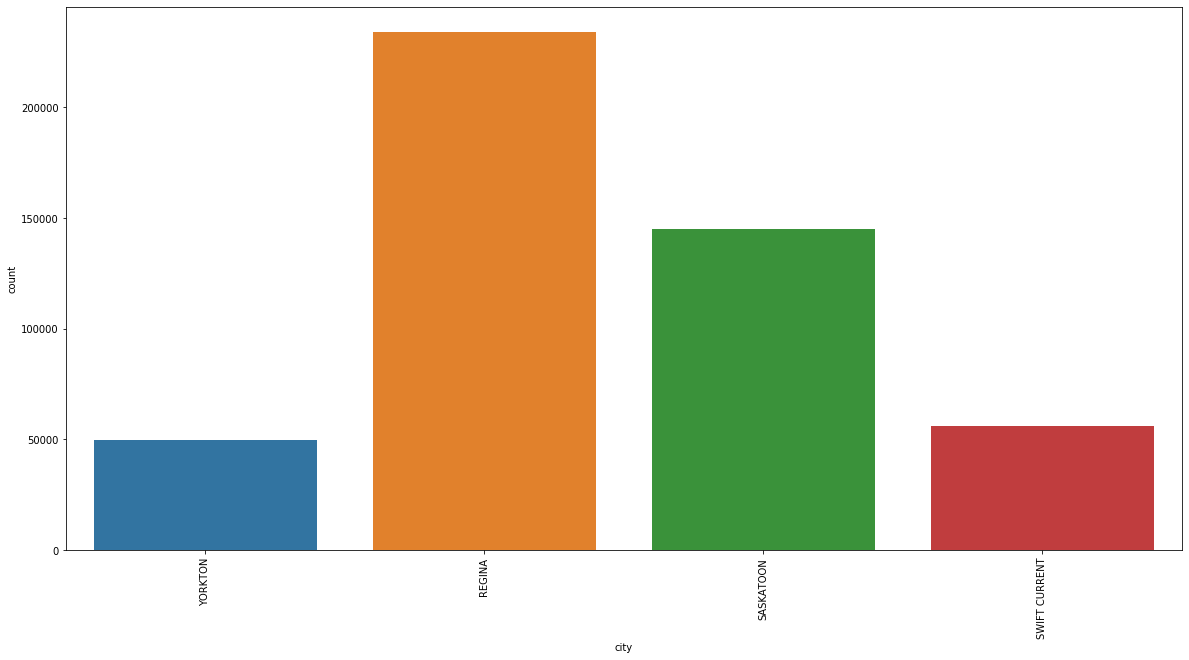

In [29]:
SK=df1[df1.province=='SK']
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
sns.countplot(SK.city)

# Number of cities in the data by province!

In [30]:
number_of_city_AB= AB.nunique()['city']
number_of_city_BC= BC.nunique()['city']
number_of_city_SK= SK.nunique()['city']

In [31]:
y= [number_of_city_AB,number_of_city_BC,number_of_city_SK]
x= ['AB','BC','SK']

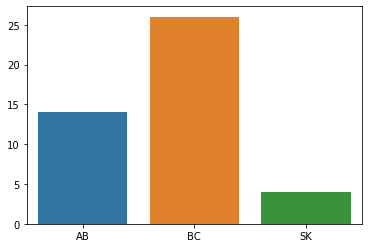

In [32]:
sns.barplot(x,y)

# Distribution of category in the data!

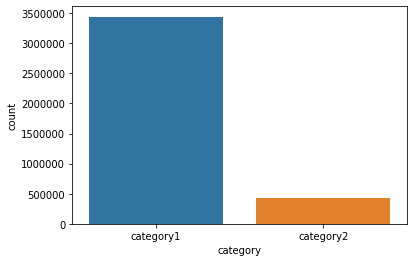

In [33]:
sns.countplot(df['category'])

Text(0.5, 1.0, 'Distribution of Department in the Data')

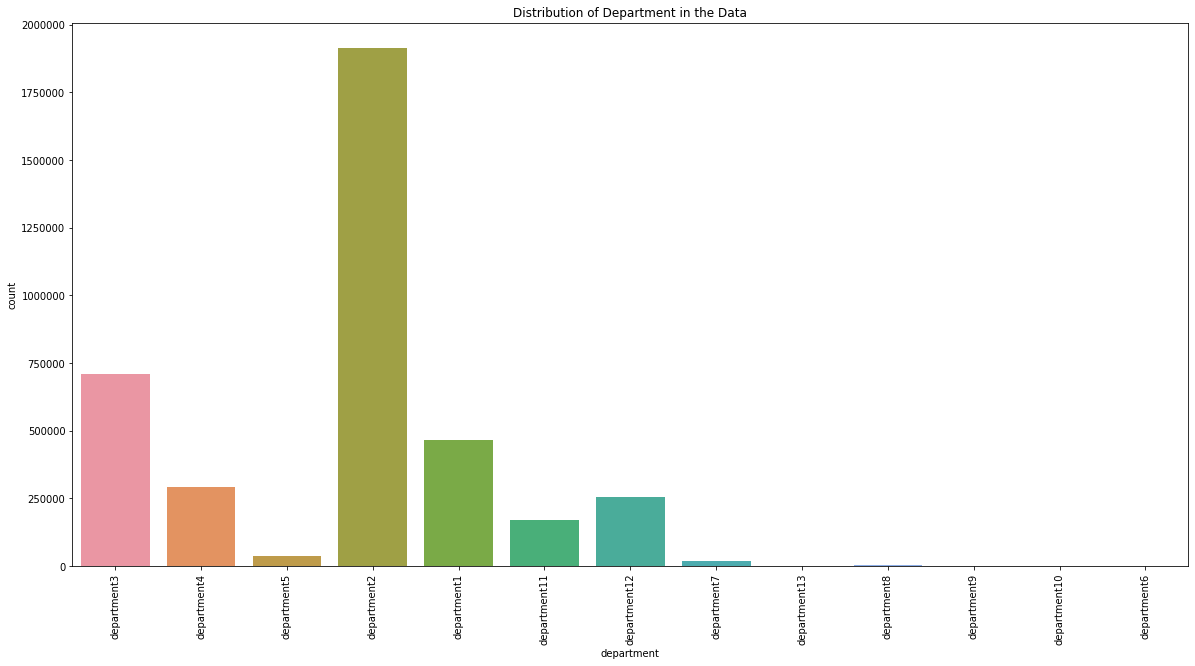

In [34]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
sns.countplot(df['department'])
plt.title('Distribution of Department in the Data')

In [35]:
# Unique Styles in the Data!

In [36]:
unique_style=df['style'].nunique()

In [37]:
(unique_style/len(df))*100

0.43559901448046584

In [36]:
unique_class=df['class'].nunique()

In [37]:
unique_class

43

In [38]:
df.vendor.nunique()

94

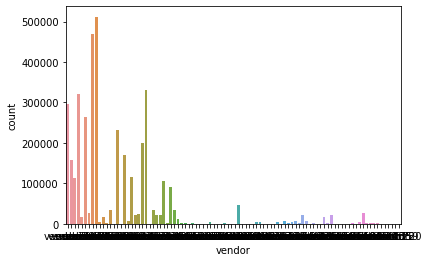

In [39]:
#Highly cardinal and imbalanced!
sns.countplot(df.vendor)

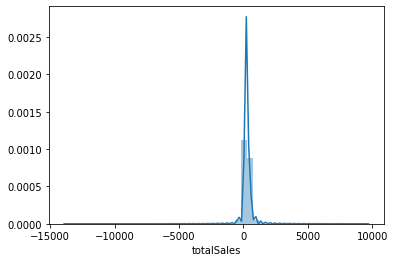

In [40]:
sns.distplot(df.totalSales)

# Highest Sales!

In [41]:
df[df.totalSales==df.totalSales.max()]

,date,province,city,category,department,class,style,vendor,totalQuantity,totalSales
2187247,2017-03-25,BC,KAMLOOPS,category1,department2,class2,style7347,vendor44,30.0,9685.474283


In [42]:
df['year']=df['date'].apply(lambda x: x[:4])

In [43]:
df['month']=df['date'].apply(lambda x:x[5:7])

In [44]:
df['day']=df['date'].apply(lambda x:x[-2:])

In [45]:
df.date=pd.to_datetime(df.date)

In [46]:
from pandas.tseries.offsets import *
df['New']=np.where(df.date.dt.weekday_name.isin(['Saturday','Sunday']),df.date+BDay(1),df.date)

In [47]:
df['is_weekend']= df.New!=df.date

Text(0.5, 1.0, 'Is it a Weekend?')

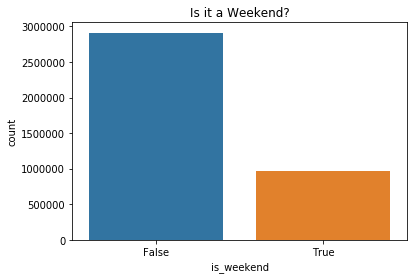

In [48]:
sns.countplot(df['is_weekend'])
plt.title('Is it a Weekend?')

In [49]:
df

,date,province,city,category,department,class,style,vendor,totalQuantity,totalSales,year,month,day,New,is_weekend
0,2014-01-01,AB,MEDICINE HAT,category1,department3,class8,style11809,vendor71,1.0,477.355518,2014,01,01,2014-01-01,False
1,2014-01-01,AB,MEDICINE HAT,category1,department3,class12,style1578,vendor79,1.0,553.455673,2014,01,01,2014-01-01,False
2,2014-01-01,AB,MEDICINE HAT,category1,department4,class16,style2305,vendor94,1.0,338.991600,2014,01,01,2014-01-01,False
3,2014-01-01,AB,MEDICINE HAT,category1,department5,class17,style8090,vendor44,1.0,535.468364,2014,01,01,2014-01-01,False
4,2014-01-01,AB,MEDICINE HAT,category1,department5,class18,style8032,vendor44,1.0,269.809641,2014,01,01,2014-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873282,2019-12-31,SK,YORKTON,category1,department3,class10,style1841,vendor24,1.0,408.173559,2019,12,31,2019-12-31,False
3873283,2019-12-31,SK,YORKTON,category1,department3,class10,style2819,vendor88,1.0,477.355518,2019,12,31,2019-12-31,False
3873284,2019-12-31,SK,YORKTON,category1,department3,class10,style15131,vendor74,1.0,408.173559,2019,12,31,2019-12-31,False
3873285,2019-12-31,SK,YORKTON,category1,department4,class16,style11184,vendor74,1.0,179.873094,2019,12,31,2019-12-31,False


In [50]:
df.city.unique()

array(['MEDICINE HAT', 'YORKTON', 'CALGARY', 'CAMROSE', 'EDMONTON',
       'GRANDE PRAIRIE', 'LETHBRIDGE', 'LLOYDMINSTER', 'OLDS', 'RED DEER',
       'SHERWOOD PARK', 'ST. ALBERT', 'STETTLER', 'WAINWRIGHT',
       'CAMPBELL RIVER', 'CHILLIWACK', 'CLEARBROOK', 'COURTENAY',
       'CRANBROOK', 'DELTA', 'DUNCAN', 'FORT ST JOHN', 'KAMLOOPS',
       'KELOWNA', 'LANGLEY', 'MAPLE RIDGE', 'MISSION', 'NELSON',
       'PENTICTON', 'PORT ALBERNI', 'QUESNEL', 'SALMON ARM', 'SECHELT',
       'SIDNEY', 'TRAIL', 'VERNON', 'WESTBANK', 'WHITE ROCK',
       'WILLIAMS LAKE', 'REGINA', 'SASKATOON', 'SWIFT CURRENT', 'TERRACE',
       'OKOTOKS'], dtype=object)

In [60]:
CanHoliday=pd.read_csv('CanadaHolidays.csv')

In [61]:
CanHoliday['Holiday']=1

In [62]:
CanHoliday['date']=pd.to_datetime(CanHoliday.date)

In [63]:
CanHoliday=CanHoliday.drop('holiday',axis=1)

In [64]:
df['is_national_holiday']=df.date

In [65]:
set_of_holidays=set(CanHoliday['date'])

In [66]:
dum=df[['is_national_holiday']].applymap(lambda x: x in set_of_holidays)

Text(0.5, 1.0, 'Is a National Holiday?')

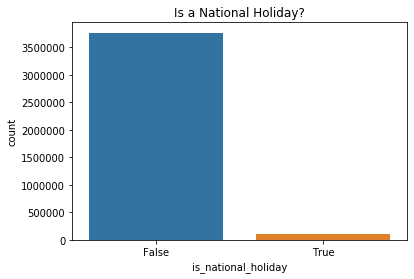

In [67]:
sns.countplot(dum.iloc[:,0])
plt.title('Is a National Holiday?')